# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharm_data_complete = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
pharm_data_complete.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
mice_number = pharm_data_complete["Mouse ID"].nunique()
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = pharm_data_complete[pharm_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]['Mouse ID'].unique()


duplicate_mice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df = pharm_data_complete.loc[pharm_data_complete["Mouse ID"] == "g989"]
duplicate_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


# Incorrect code, please edit

In [5]:
#Set the index to "Mouse ID" to help drop the duplicates
index_df = pharm_data_complete.set_index('Mouse ID')
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = index_df.drop('g989')

clean_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
b128,Capomulin,Female,9,22,0,45.000000,0
f932,Ketapril,Male,15,29,0,45.000000,0
g107,Ketapril,Female,2,29,0,45.000000,0
a457,Ketapril,Female,11,30,0,45.000000,0
c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...
r944,Capomulin,Male,12,25,45,41.581521,2
u364,Capomulin,Male,18,17,45,31.023923,3
p438,Ceftamin,Female,11,26,45,61.433892,1


In [6]:
# Created a dataframe that reset the index 'Mouse ID' as a column. 
# Used .reset_index()
pharm_clean_data = clean_data.reset_index()
# Checking the number of mice in the clean DataFrame.
mice_number_2 = pharm_clean_data["Mouse ID"].nunique()
mice_number_2


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
pharm_mean = pharm_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
pharm_median = pharm_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
pharm_variance = pharm_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
pharm_std = pharm_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
pharm_sem = pharm_clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()


In [8]:
# Assemble the tumor volume summary statistics into a single summary DataFrame.
tumor_vol_stats = pd.DataFrame(
    {
        "Mean Tumour Volume": pharm_mean,
        "Tumour Volume Median": pharm_median,
        "Tumour Volume Variance": pharm_variance,
        "Tumour Volume Standard Deviation": pharm_std,
        "Tumour Volume SEM": pharm_sem
    }
)

# Display the DataFrame
tumor_vol_stats


,Mean Tumour Volume,Tumour Volume Median,Tumour Volume Variance,Tumour Volume Standard Deviation,Tumour Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Unsure if this code below is correct, there is no title D:

In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tumor_stats = pharm_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_stats


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

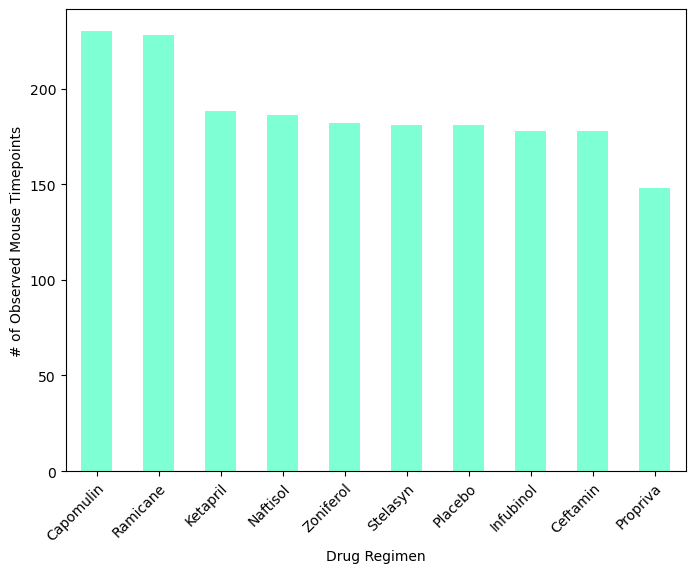

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#Get total number of mouse timepoints per each drug regimen
drug_data = pharm_clean_data["Drug Regimen"].value_counts()

figure1 = drug_data.plot(kind="bar", facecolor="aquamarine", figsize=(8,6),
                                    xlabel="Drug Regimen",
                                ylabel="# of Observed Mouse Timepoints")

# Configure x-tick rotation
xticklabels = drug_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.show()


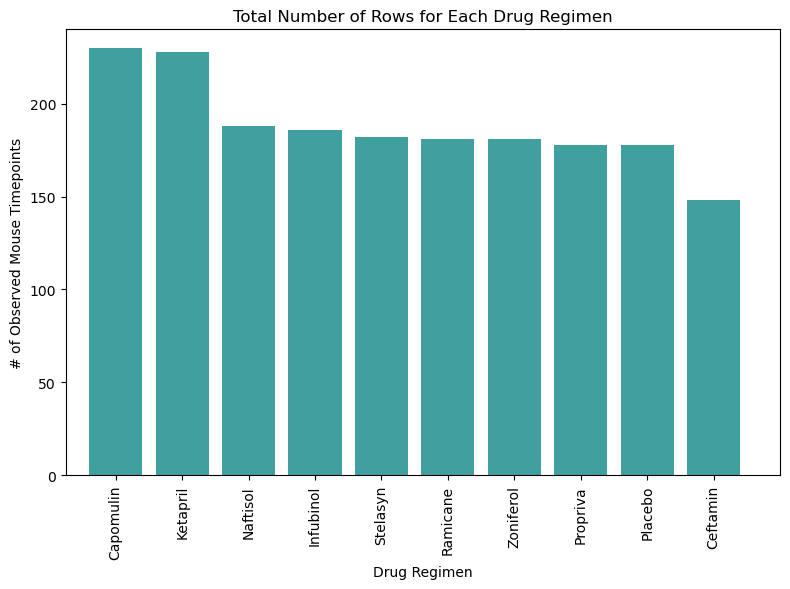

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis and tick locations
x_axis = pharm_clean_data["Drug Regimen"].unique()
y_axis = pharm_clean_data["Drug Regimen"].value_counts() 

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(x_axis, y_axis, color='teal', alpha=0.75, align="center")


# Configure the plot
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(y_axis)+10)

plt.tight_layout()
plt.show()



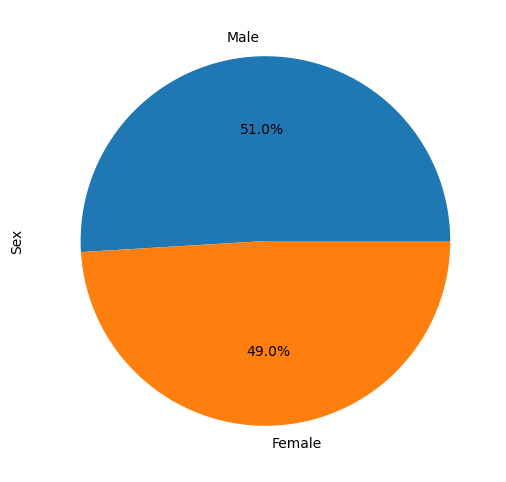

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_count = pharm_clean_data["Sex"].value_counts() 
mice_data = mice_count.index.tolist()

mice_count.plot(kind="pie", autopct='%1.1f%%', figsize=(8,6),
                                ylabel="Sex")

# Configure x-tick rotation
xticklabels = mice_data.index

# Show plot
plt.show()




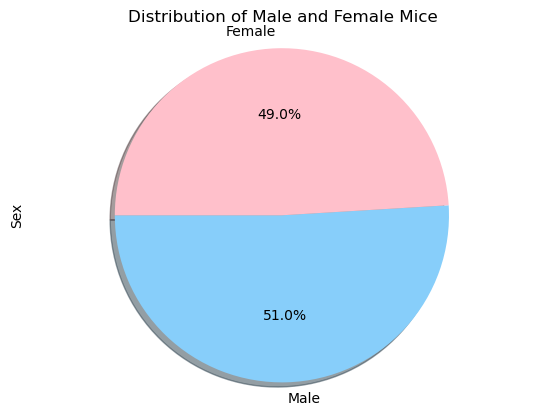

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_count = pharm_clean_data["Sex"].value_counts() 
mice_data = mice_count.index.tolist()
colors = ["lightskyblue", "pink"]

plt.title("Distribution of Male and Female Mice")
plt.pie(mice_count, labels=mice_data, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.ylabel('Sex') # labeled the pie chart
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
